In [1]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/thermodynamics.git@master

  Cloning https://github.com/ParkhomenkoDV/thermodynamics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-sfdlgfh4
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/thermodynamics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-sfdlgfh4
  Resolved https://github.com/ParkhomenkoDV/thermodynamics.git to commit f30e13c02fbde980308643f5918fb71a2c9b8a02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-_jsumyk7/mathematics_57b4e7c23bf741fbb1cd4cbee196bc13
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-_jsumyk7/mathematic

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from thermodynamics import gas_const, heat_capacity_at_constant_pressure

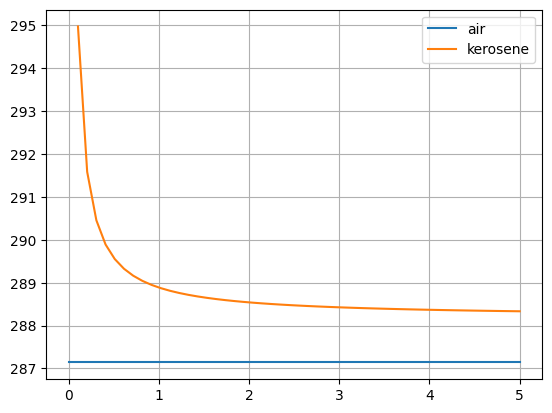

In [18]:
eo = np.linspace(0, 5)

plt.plot(eo, [gas_const("air") for _ in eo], label="air")
plt.plot(eo, [gas_const("exhaust", eo, fuel="kerosene") for eo in eo], label="kerosene")

plt.legend()
plt.grid()
plt.show()

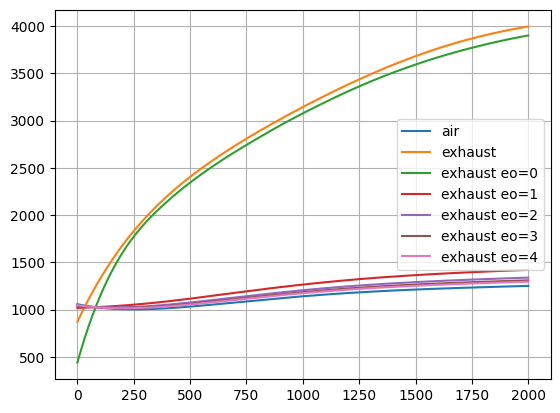

In [38]:
temperature = np.linspace(0, 2000, 1000)

plt.plot(temperature, [heat_capacity_at_constant_pressure("air", t) for t in temperature], label="air")
plt.plot(temperature, [heat_capacity_at_constant_pressure("exhaust", t, fuel="kerosene") for t in temperature], label="exhaust")
for eo in range(5):
    plt.plot(temperature, [heat_capacity_at_constant_pressure("exhaust", t, excess_oxidizing=eo, fuel="kerosene") for t in temperature], label=f"exhaust {eo=}")

plt.legend()
plt.grid()
plt.show()